In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [528]:
data = pd.read_csv("churn_prediction.csv")

# Exploring data

In [529]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [530]:
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [531]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [532]:
data.isnull().sum()





customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [533]:
data[data['city'].isnull()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
41,44,282,90,NaN,NaN,self_employed,NaN,3,2939,61.0,...,7870.87,7265.10,4324.97,0.23,0.23,0.23,0.23,7870.87,7870.87,0
121,127,2919,66,Male,1.0,retired,NaN,1,16,0.0,...,48883.19,57415.13,16768.78,382.80,5910.64,31358.79,21735.89,27160.15,55694.76,1
131,139,3425,43,Male,2.0,salaried,NaN,3,2245,32.0,...,2189.98,1930.66,4036.99,0.13,8742.99,1105.96,3900.13,1872.19,1716.76,0
234,256,1490,90,Male,0.0,self_employed,NaN,2,2375,21.0,...,751.24,3547.03,1577.53,11748.99,693.26,308.81,1523.54,9824.97,180.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28307,30221,1210,24,Male,0.0,self_employed,NaN,3,1782,7.0,...,26687.01,26967.83,22432.45,1.27,151.23,305.35,759.41,26578.39,26909.99,0
28311,30227,5039,65,Female,0.0,retired,NaN,2,104,151.0,...,5791.13,6461.80,9094.18,0.50,0.50,498.36,929.07,5933.91,5980.07,0
28318,30234,4277,37,Male,0.0,self_employed,NaN,2,1491,315.0,...,1434.98,1471.50,1530.22,0.03,0.03,0.03,0.03,1430.25,1481.71,0
28322,30238,4428,39,Male,0.0,salaried,NaN,3,38,17.0,...,3377.61,3584.53,3694.24,1000.50,643.36,422.77,398.03,3693.85,3404.45,0


In [534]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [535]:
for col in data:
    print('\n\n',col,'\n')
    print(data[col].value_counts())



 customer_id 

2047     1
3403     1
15661    1
9518     1
21824    1
        ..
17053    1
23198    1
21151    1
10928    1
2049     1
Name: customer_id, Length: 28382, dtype: int64


 vintage 

1432    25
1997    23
403     21
1718    20
1400    20
        ..
3903     1
6067     1
5614     1
3581     1
5703     1
Name: vintage, Length: 5473, dtype: int64


 age 

90    1003
40     722
43     711
42     699
37     691
      ... 
3       34
89      24
88      20
2       17
1        4
Name: age, Length: 90, dtype: int64


 gender 

Male      16548
Female    11309
Name: gender, dtype: int64


 dependents 

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64


 occupation 

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupati

In [536]:
data.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


# Boxplot Analysis

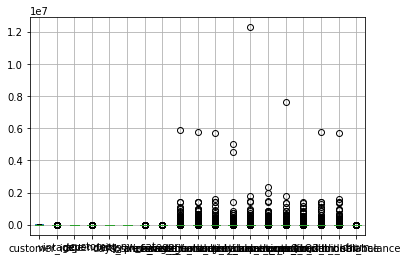

In [537]:
data.boxplot()

In [538]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

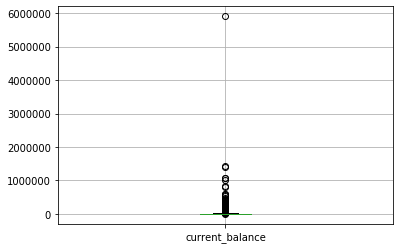

In [539]:
data.boxplot('current_balance')
#

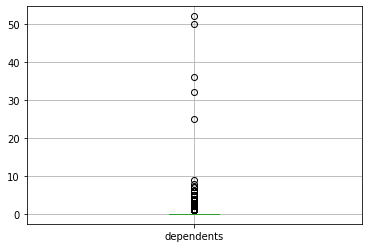

In [540]:
data.boxplot('dependents')

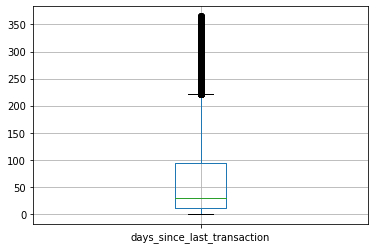

In [541]:
data.boxplot('days_since_last_transaction')

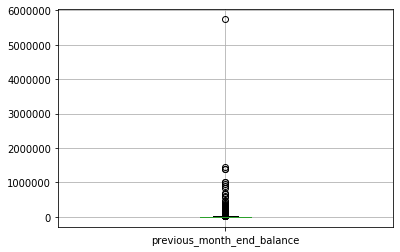

In [542]:
data.boxplot('previous_month_end_balance')
#

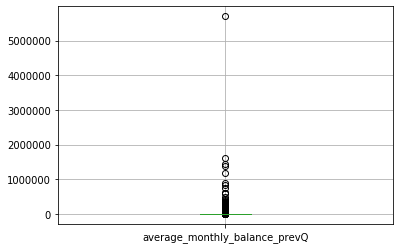

In [543]:
data.boxplot('average_monthly_balance_prevQ')
#

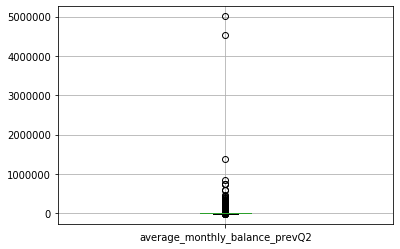

In [544]:
data.boxplot('average_monthly_balance_prevQ2')
#

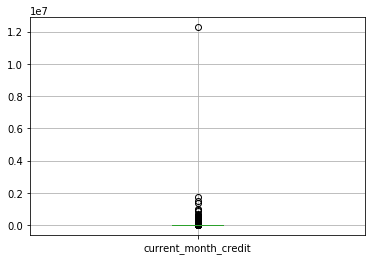

In [545]:
data.boxplot('current_month_credit')
##

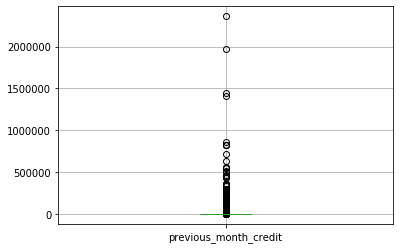

In [546]:
data.boxplot('previous_month_credit')
#

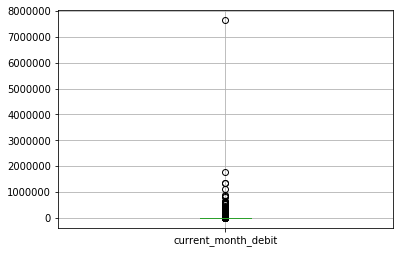

In [547]:
data.boxplot('current_month_debit')
##

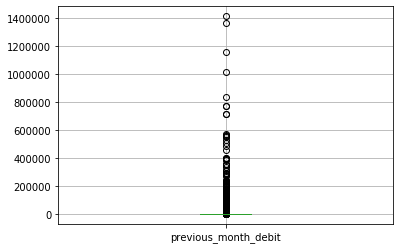

In [548]:
data.boxplot('previous_month_debit')
##

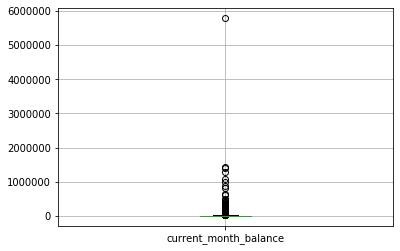

In [549]:
data.boxplot('current_month_balance')
##

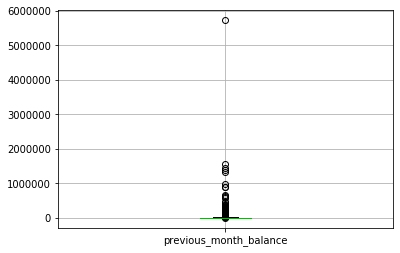

In [550]:
data.boxplot('previous_month_balance')
##

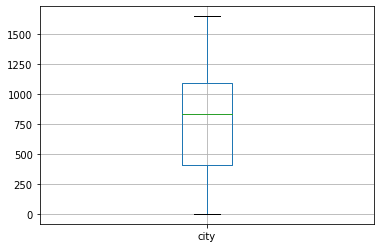

In [551]:
data.boxplot('city')

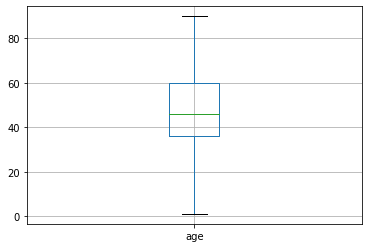

In [552]:
data.boxplot('age')

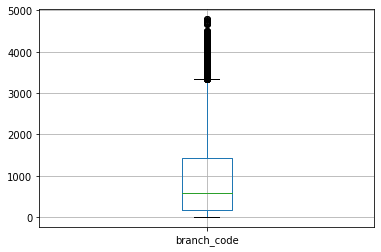

In [553]:
data.boxplot('branch_code')

# Finding out Outliers

In [554]:
data[data['current_month_debit']<5000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [555]:
data[data['average_monthly_balance_prevQ2']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
2031,2174,185,90,Male,NaN,NaN,499.0,3,647,0.0,...,2731.71,249546.45,4526049.01,35205.37,80899.25,37177.01,209375.89,8932.18,40335.19,1
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.10,5232.34,1452.87,17327.27,17248.30,5778184.77,5720144.50,0
23247,24807,1732,90,Male,0.0,self_employed,1294.0,2,150,NaN,...,1398486.42,1398486.42,1389626.93,0.31,0.31,0.31,0.31,1398486.42,1398486.42,0


In [556]:
data[data['average_monthly_balance_prevQ']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.10,5232.34,1452.87,17327.27,17248.30,5778184.77,5720144.50,0
12712,13575,2418,73,Female,0.0,self_employed,834.0,2,469,0.0,...,1001088.10,1192704.04,251523.86,57143.49,102.81,215561.70,568052.57,1001725.71,1326486.64,0
23211,24764,2560,90,NaN,0.0,self_employed,751.0,2,138,108.0,...,1396836.81,1608344.15,757872.97,0.56,0.56,240137.37,95975.76,1284357.61,1572832.93,1
23247,24807,1732,90,Male,0.0,self_employed,1294.0,2,150,NaN,...,1398486.42,1398486.42,1389626.93,0.31,0.31,0.31,0.31,1398486.42,1398486.42,0
27856,29735,194,90,Male,0.0,NaN,904.0,1,296,213.0,...,1435872.80,1435872.80,413107.52,0.24,0.24,0.24,0.24,1435872.80,1435872.80,0


In [557]:
data[data['current_month_credit']>500000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
1817,1948,254,61,Male,0.0,self_employed,1020.0,2,1105,3.0,...,9312.81,51134.99,38098.22,858432.89,819764.11,862469.01,837476.76,13362.95,21893.22,1
2078,2223,2260,90,NaN,0.0,self_employed,224.0,1,1687,0.0,...,69194.28,57750.62,105927.68,634428.70,566428.70,650000.13,557142.99,50278.03,69148.20,0
2503,2673,6059,54,Male,2.0,self_employed,905.0,1,34,9.0,...,1264.96,34657.00,8111.60,699047.06,825969.46,378186.26,508168.04,38594.53,55638.95,1
5688,6060,1790,45,Female,0.0,self_employed,1020.0,1,291,0.0,...,8822.30,128176.81,89532.45,577643.68,20000.41,2919.16,1725.05,359822.63,9178.55,0
6120,6518,1103,90,NaN,NaN,self_employed,409.0,2,588,11.0,...,243626.01,490044.03,335042.86,995241.38,216939.28,1110922.50,1012877.80,392962.66,618549.76,0
7787,8295,2895,51,Male,0.0,self_employed,1232.0,1,7,4.0,...,206014.78,284779.02,323182.68,1476976.45,2361808.29,824573.99,1159958.76,263497.14,383897.54,0
8023,8550,196,90,NaN,NaN,self_employed,623.0,1,42,4.0,...,314682.02,92596.95,481.78,915151.36,0.20,1335714.49,100000.20,124326.08,153068.88,0
8471,9025,1582,32,Male,0.0,salaried,146.0,2,76,4.0,...,884.96,2662.49,4426.52,590000.03,36.95,614285.74,4345.66,3564.10,1766.26,0
12218,13047,3882,51,Male,0.0,self_employed,1020.0,1,60,7.0,...,356602.22,170440.29,113738.06,1383300.84,1971436.45,242838.61,8394.94,131732.17,300160.62,0
13012,13895,2903,55,Female,0.0,self_employed,1534.0,2,63,11.0,...,22919.79,22416.17,22092.02,1764285.97,71428.83,1764285.97,71428.83,23278.80,22617.63,0


In [558]:
data[data['previous_month_credit']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
5637,6003,1690,36,Male,2.0,salaried,1096.0,1,1719,0.0,...,2266.61,6033.10,9665.78,10181.39,1413436.47,11514.33,1414168.06,2152.97,12023.31,0
7787,8295,2895,51,Male,0.0,self_employed,1232.0,1,7,4.0,...,206014.78,284779.02,323182.68,1476976.45,2361808.29,824573.99,1159958.76,263497.14,383897.54,0
9493,10131,2867,59,Male,2.0,self_employed,1020.0,1,410,0.0,...,34005.37,12074.81,7655.22,486187.64,1447086.21,457836.21,1363197.64,13812.27,20309.54,0
12218,13047,3882,51,Male,0.0,self_employed,1020.0,1,60,7.0,...,356602.22,170440.29,113738.06,1383300.84,1971436.45,242838.61,8394.94,131732.17,300160.62,0


In [559]:
data[data['previous_month_debit']>600000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
1817,1948,254,61,Male,0.0,self_employed,1020.0,2,1105,3.0,...,9312.81,51134.99,38098.22,858432.89,819764.11,862469.01,837476.76,13362.95,21893.22,1
5637,6003,1690,36,Male,2.0,salaried,1096.0,1,1719,0.0,...,2266.61,6033.10,9665.78,10181.39,1413436.47,11514.33,1414168.06,2152.97,12023.31,0
6120,6518,1103,90,NaN,NaN,self_employed,409.0,2,588,11.0,...,243626.01,490044.03,335042.86,995241.38,216939.28,1110922.50,1012877.80,392962.66,618549.76,0
7637,8134,3506,54,Male,1.0,self_employed,1020.0,2,60,26.0,...,276.10,1686.08,2582.02,786.03,825646.74,2135.65,775453.50,756.62,1387.05,0
7787,8295,2895,51,Male,0.0,self_employed,1232.0,1,7,4.0,...,206014.78,284779.02,323182.68,1476976.45,2361808.29,824573.99,1159958.76,263497.14,383897.54,0
9493,10131,2867,59,Male,2.0,self_employed,1020.0,1,410,0.0,...,34005.37,12074.81,7655.22,486187.64,1447086.21,457836.21,1363197.64,13812.27,20309.54,0
13854,14788,4889,32,Female,0.0,self_employed,1020.0,1,60,6.0,...,692060.83,63253.07,6072.43,479824.21,454882.64,220117.42,715116.59,70003.82,96969.94,0
20294,21654,2138,90,NaN,0.0,self_employed,1096.0,2,1557,9.0,...,1284.50,31455.83,8377.90,421428.83,713571.69,400000.26,712857.40,14584.99,69556.39,0
25256,26961,792,49,Female,0.0,self_employed,1020.0,1,16,54.0,...,27063.75,30850.91,16657.72,0.26,500214.54,4897.04,771278.83,22842.38,39297.90,1


In [560]:
data[data['current_month_debit']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
6120,6518,1103,90,NaN,NaN,self_employed,409.0,2,588,11.0,...,243626.01,490044.03,335042.86,995241.38,216939.28,1110922.50,1012877.80,392962.66,618549.76,0
8023,8550,196,90,NaN,NaN,self_employed,623.0,1,42,4.0,...,314682.02,92596.95,481.78,915151.36,0.20,1335714.49,100000.20,124326.08,153068.88,0
13012,13895,2903,55,Female,0.0,self_employed,1534.0,2,63,11.0,...,22919.79,22416.17,22092.02,1764285.97,71428.83,1764285.97,71428.83,23278.80,22617.63,0
18023,19230,2284,43,Male,1.0,salaried,334.0,2,4,21.0,...,8660.68,172042.14,36207.95,857.27,2666.07,1337277.36,3694.03,454030.95,18647.47,1
24095,25712,1192,90,Male,0.0,retired,1020.0,2,5,18.0,...,24270.54,11728.39,111617.41,12269845.39,0.21,7637857.36,0.21,8399.62,24270.54,1


In [561]:
data[data['dependents']>10]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
3741,3988,293,43,Male,52.0,self_employed,531.0,2,1561,5.0,...,2270.12,1923.59,299.47,286.36,572.07,72.07,47.97,2297.21,2187.11,0
7820,8331,233,41,Male,36.0,salaried,745.0,2,1475,58.0,...,14490.23,13081.65,9164.66,0.10,714.39,0.10,0.10,14550.66,14471.34,0
9082,9688,1412,58,Male,50.0,salaried,1025.0,3,2622,11.0,...,7280.36,5717.36,1260.96,13857.19,0.04,19528.61,0.04,8597.22,7279.26,1
14016,14957,557,30,Male,25.0,self_employed,905.0,2,34,0.0,...,102.01,1526.61,1612.37,13100.21,5949.14,1737.36,3155.14,631.42,442.29,0
23681,25267,191,45,Male,32.0,salaried,345.0,3,2277,62.0,...,1074.70,1455.26,1166.65,0.46,0.46,475.67,488.20,1841.57,1167.09,0


In [562]:
data[data['previous_month_balance']>2000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5,0


In [563]:
data[data['previous_month_end_balance']>2000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5,0


In [564]:
data[data['current_month_balance']>1000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
9908,10575,1670,90,NaN,NaN,self_employed,243.0,2,2542,18.0,...,5740438.63,5700289.57,5010170.10,5232.34,1452.87,17327.27,17248.30,5778184.77,5720144.50,0
12712,13575,2418,73,Female,0.0,self_employed,834.0,2,469,0.0,...,1001088.10,1192704.04,251523.86,57143.49,102.81,215561.70,568052.57,1001725.71,1326486.64,0
19977,21317,842,1,Male,0.0,self_employed,105.0,2,650,18.0,...,1001123.73,618417.06,581507.67,216396.14,143980.87,141428.59,571428.59,1074624.64,663884.48,1
23211,24764,2560,90,NaN,0.0,self_employed,751.0,2,138,108.0,...,1396836.81,1608344.15,757872.97,0.56,0.56,240137.37,95975.76,1284357.61,1572832.93,1
23247,24807,1732,90,Male,0.0,self_employed,1294.0,2,150,NaN,...,1398486.42,1398486.42,1389626.93,0.31,0.31,0.31,0.31,1398486.42,1398486.42,0
27856,29735,194,90,Male,0.0,NaN,904.0,1,296,213.0,...,1435872.80,1435872.80,413107.52,0.24,0.24,0.24,0.24,1435872.80,1435872.80,0


# Univariate Analysis(HIstogram)

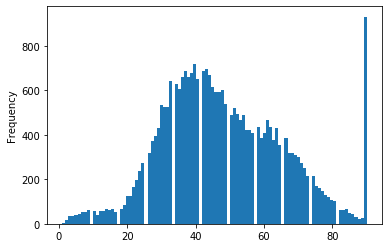

In [624]:
data['age'].plot.hist(bins=100)

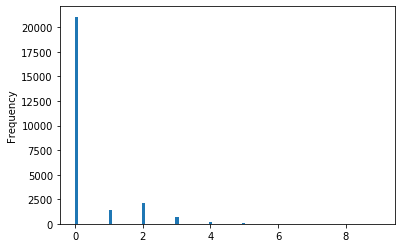

In [625]:
data['dependents'].plot.hist(bins=100)

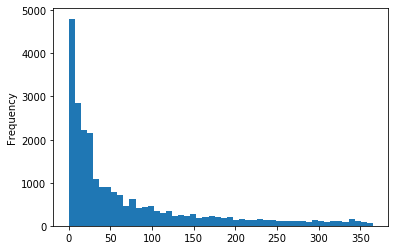

In [626]:
data['days_since_last_transaction'].plot.hist(bins=50)

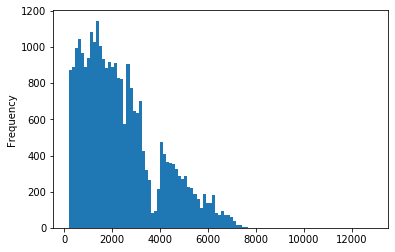

In [627]:
data['vintage'].plot.hist(bins=100)

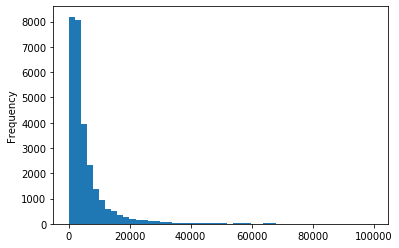

In [628]:
data['current_balance'].plot.hist(bins=50)

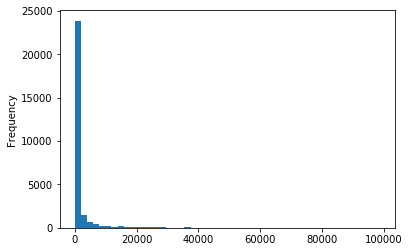

In [629]:
data['current_month_credit'].plot.hist(bins=50)

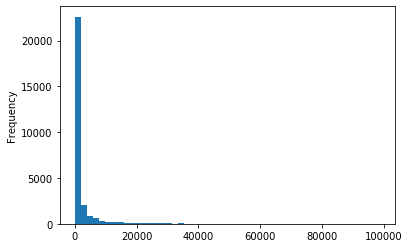

In [630]:
data['current_month_debit'].plot.hist(bins=50)

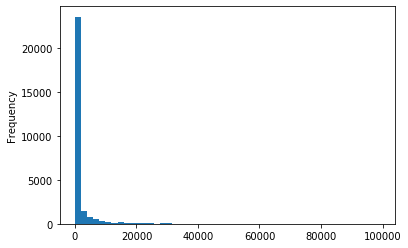

In [631]:
data['previous_month_credit'].plot.hist(bins=50)

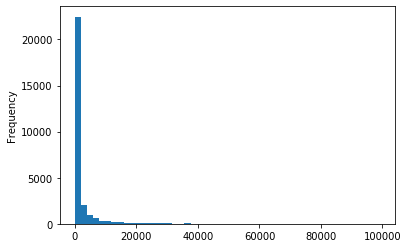

In [632]:
data['previous_month_debit'].plot.hist(bins=50)

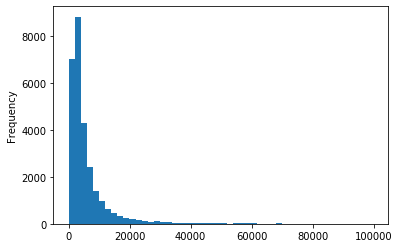

In [633]:
data['current_month_balance'].plot.hist(bins=50)

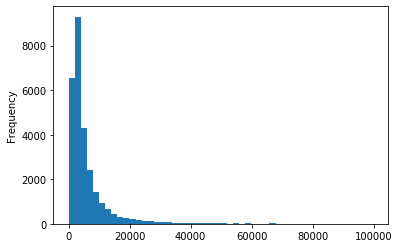

In [634]:
data['previous_month_balance'].plot.hist(bins=50)

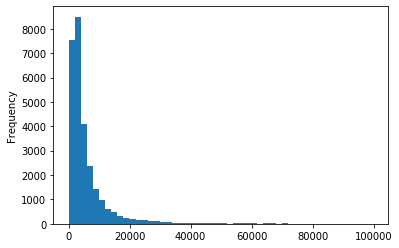

In [635]:
data['previous_month_end_balance'].plot.hist(bins=50)

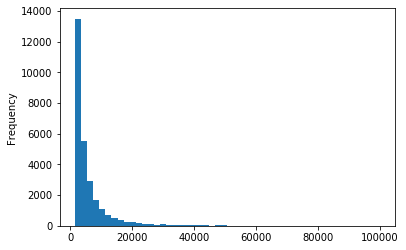

In [636]:
data['average_monthly_balance_prevQ'].plot.hist(bins=50)

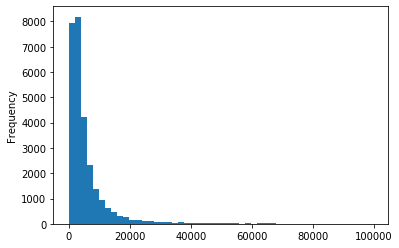

In [637]:
data['average_monthly_balance_prevQ2'].plot.hist(bins=50)

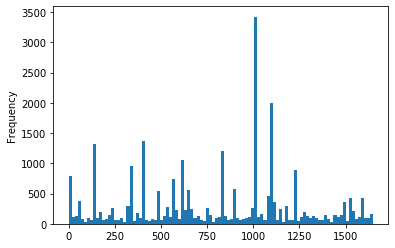

In [638]:
data['city'].plot.hist(bins=100)

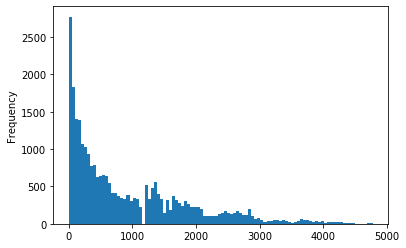

In [639]:
data['branch_code'].plot.hist(bins=100)

# Bivariate Analysis

In [581]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

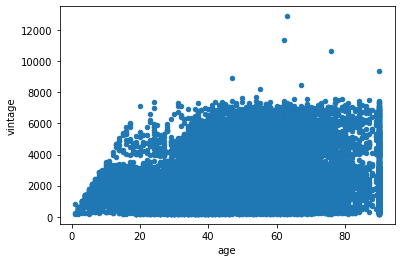

In [640]:
data.plot.scatter('age','vintage')

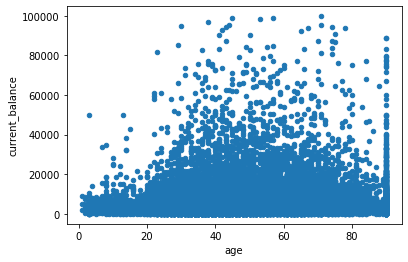

In [641]:
data.plot.scatter('age','current_balance')

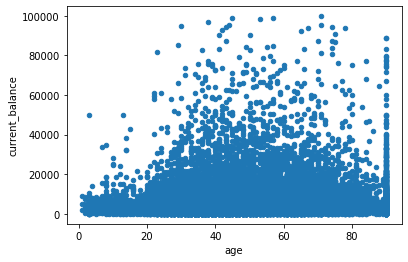

In [642]:
data[data['current_balance']<2000000].plot.scatter('age','current_balance')

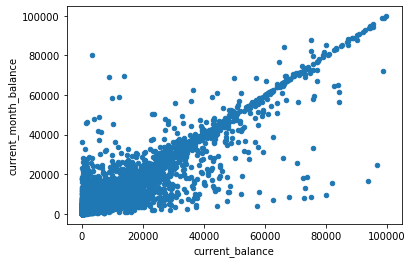

In [643]:
data.plot.scatter('current_balance','current_month_balance')

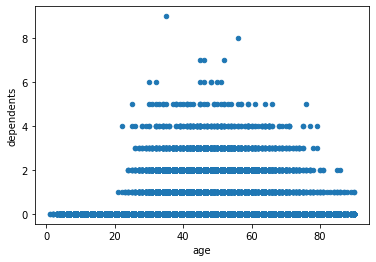

In [644]:
data.plot.scatter('age','dependents')

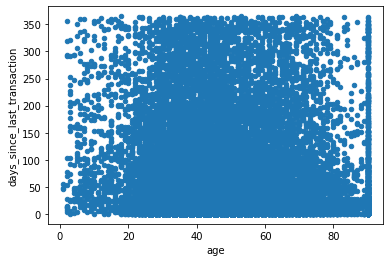

In [645]:
data.plot.scatter('age','days_since_last_transaction')

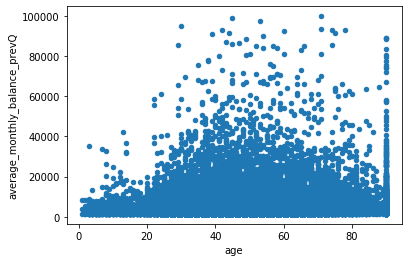

In [646]:
data.plot.scatter('age','average_monthly_balance_prevQ')

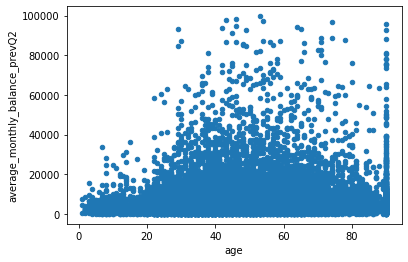

In [647]:
data.plot.scatter('age','average_monthly_balance_prevQ2')

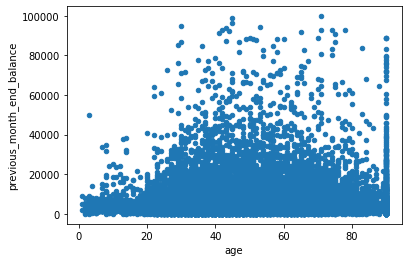

In [648]:
data.plot.scatter('age','previous_month_end_balance')

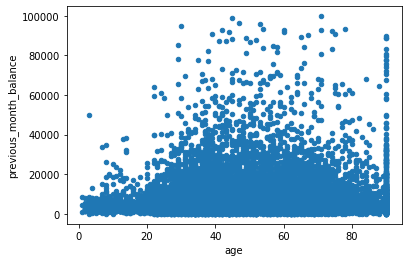

In [649]:
data.plot.scatter('age','previous_month_balance')

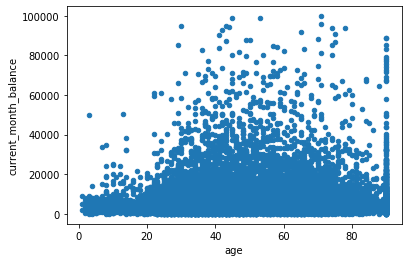

In [650]:
data.plot.scatter('age','current_month_balance')

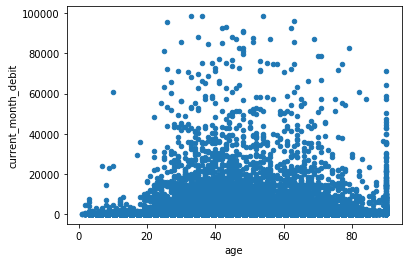

In [651]:
data.plot.scatter('age','current_month_debit')

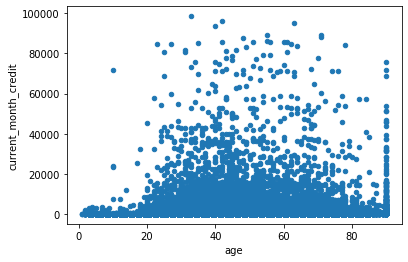

In [652]:
data.plot.scatter('age','current_month_credit')

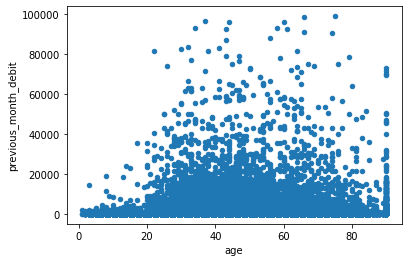

In [653]:
data.plot.scatter('age','previous_month_debit')

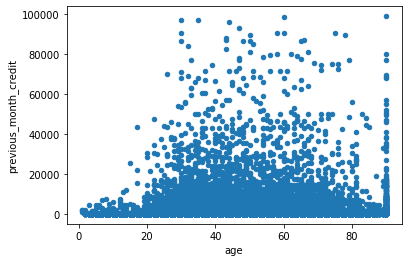

In [654]:
data.plot.scatter('age','previous_month_credit')

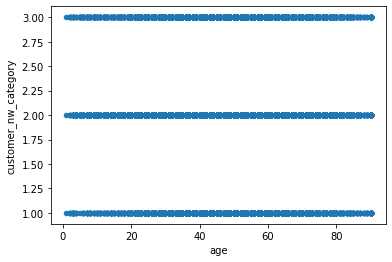

In [655]:
data.plot.scatter('age','customer_nw_category')

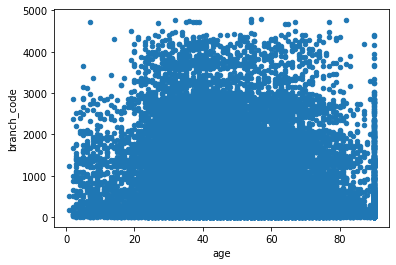

In [656]:
data.plot.scatter('age','branch_code')

In [657]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

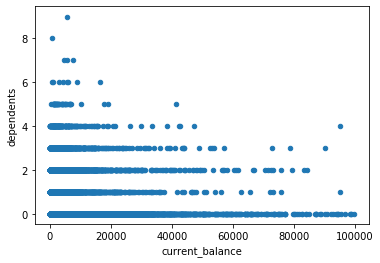

In [658]:
data.plot.scatter('current_balance','dependents')

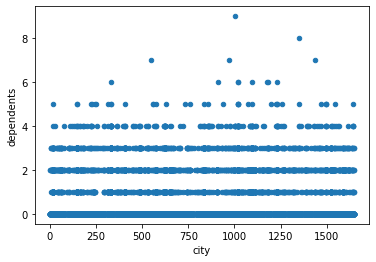

In [659]:
data.plot.scatter('city','dependents')

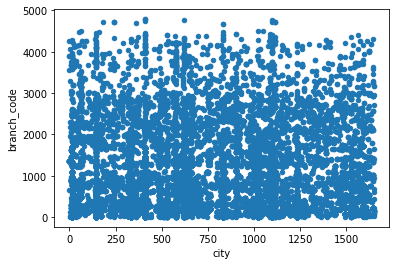

In [660]:
data.plot.scatter('city','branch_code')

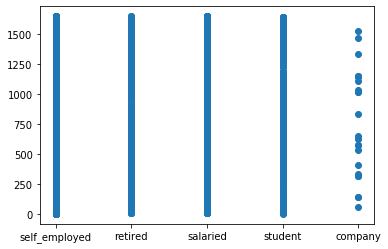

In [661]:
data1 = data.dropna()
plt.scatter(data1['occupation'],data1['city'])

(80, 21)
2
1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
81,85,1206,65,Male,0.0,NaN,619.0,3,1761,13.0,...,7713.06,5382.72,2313.62,10165.10,15515.99,10075.57,10638.66,4390.67,8821.53,0
331,356,1881,60,Female,0.0,NaN,104.0,3,2158,68.0,...,4067.44,4165.99,2568.53,0.57,0.57,2796.57,0.57,2029.45,4068.37,1
724,774,970,62,Male,0.0,NaN,697.0,3,1812,28.0,...,1624.52,1596.87,1280.69,142.90,142.90,0.04,0.04,1767.37,1610.69,0
997,1064,4163,85,Male,1.0,NaN,299.0,2,373,86.0,...,7515.37,8212.52,10654.11,0.16,0.16,5457.09,1069.30,6071.09,8172.59,0
1052,1125,3165,40,Female,0.0,NaN,146.0,1,1756,NaN,...,1936.05,1895.01,2061.69,0.06,0.06,0.06,0.06,2027.52,1882.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27072,28905,416,40,Male,0.0,NaN,823.0,2,1642,121.0,...,8003.54,9612.83,14672.06,0.60,0.60,714.89,2286.31,7461.67,8757.47,0
27336,29189,269,35,Male,NaN,NaN,1020.0,3,666,18.0,...,8162.56,5676.93,5579.05,757.46,3251.61,8571.61,1428.76,4849.35,7485.51,1
27581,29441,1201,90,NaN,NaN,NaN,38.0,2,1464,11.0,...,25674.35,90010.64,233411.49,1589.01,0.67,21832.80,68705.47,103148.24,53252.23,0
27856,29735,194,90,Male,0.0,NaN,904.0,1,296,213.0,...,1435872.80,1435872.80,413107.52,0.24,0.24,0.24,0.24,1435872.80,1435872.80,0


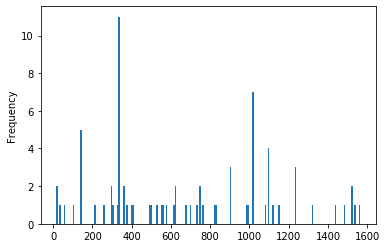

In [604]:
data2 = data[data['occupation'].isnull()]
print(data2.shape)
print(data2['city'].isnull().sum())
print(data['city'].value_counts())
data2['city'].plot.hist(bins=200)
data2

In [605]:
data3 = data[data['city'].isnull()]
print(data3.shape)
print(data3['occupation'].value_counts())
print(data3['occupation'].isnull().sum())
data3

(803, 21)
self_employed    493
salaried         193
retired           59
student           53
company            3
Name: occupation, dtype: int64
2


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
41,44,282,90,NaN,NaN,self_employed,NaN,3,2939,61.0,...,7870.87,7265.10,4324.97,0.23,0.23,0.23,0.23,7870.87,7870.87,0
121,127,2919,66,Male,1.0,retired,NaN,1,16,0.0,...,48883.19,57415.13,16768.78,382.80,5910.64,31358.79,21735.89,27160.15,55694.76,1
131,139,3425,43,Male,2.0,salaried,NaN,3,2245,32.0,...,2189.98,1930.66,4036.99,0.13,8742.99,1105.96,3900.13,1872.19,1716.76,0
234,256,1490,90,Male,0.0,self_employed,NaN,2,2375,21.0,...,751.24,3547.03,1577.53,11748.99,693.26,308.81,1523.54,9824.97,180.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28307,30221,1210,24,Male,0.0,self_employed,NaN,3,1782,7.0,...,26687.01,26967.83,22432.45,1.27,151.23,305.35,759.41,26578.39,26909.99,0
28311,30227,5039,65,Female,0.0,retired,NaN,2,104,151.0,...,5791.13,6461.80,9094.18,0.50,0.50,498.36,929.07,5933.91,5980.07,0
28318,30234,4277,37,Male,0.0,self_employed,NaN,2,1491,315.0,...,1434.98,1471.50,1530.22,0.03,0.03,0.03,0.03,1430.25,1481.71,0
28322,30238,4428,39,Male,0.0,salaried,NaN,3,38,17.0,...,3377.61,3584.53,3694.24,1000.50,643.36,422.77,398.03,3693.85,3404.45,0


In [606]:
data[data['occupation'].isnull()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
81,85,1206,65,Male,0.0,NaN,619.0,3,1761,13.0,...,7713.06,5382.72,2313.62,10165.10,15515.99,10075.57,10638.66,4390.67,8821.53,0
331,356,1881,60,Female,0.0,NaN,104.0,3,2158,68.0,...,4067.44,4165.99,2568.53,0.57,0.57,2796.57,0.57,2029.45,4068.37,1
724,774,970,62,Male,0.0,NaN,697.0,3,1812,28.0,...,1624.52,1596.87,1280.69,142.90,142.90,0.04,0.04,1767.37,1610.69,0
997,1064,4163,85,Male,1.0,NaN,299.0,2,373,86.0,...,7515.37,8212.52,10654.11,0.16,0.16,5457.09,1069.30,6071.09,8172.59,0
1052,1125,3165,40,Female,0.0,NaN,146.0,1,1756,NaN,...,1936.05,1895.01,2061.69,0.06,0.06,0.06,0.06,2027.52,1882.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27072,28905,416,40,Male,0.0,NaN,823.0,2,1642,121.0,...,8003.54,9612.83,14672.06,0.60,0.60,714.89,2286.31,7461.67,8757.47,0
27336,29189,269,35,Male,NaN,NaN,1020.0,3,666,18.0,...,8162.56,5676.93,5579.05,757.46,3251.61,8571.61,1428.76,4849.35,7485.51,1
27581,29441,1201,90,NaN,NaN,NaN,38.0,2,1464,11.0,...,25674.35,90010.64,233411.49,1589.01,0.67,21832.80,68705.47,103148.24,53252.23,0
27856,29735,194,90,Male,0.0,NaN,904.0,1,296,213.0,...,1435872.80,1435872.80,413107.52,0.24,0.24,0.24,0.24,1435872.80,1435872.80,0


In [607]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

# Dealing with Outliers 

## Delete all the identified outliers and lets see the result. 
## The strategy is to find the predict % and change how we treat outliers accordingly

4.747508997437283

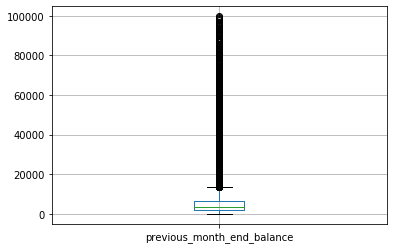

In [608]:
f = 'previous_month_end_balance'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.686681997022146

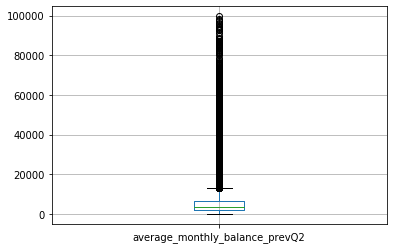

In [609]:
f = 'average_monthly_balance_prevQ2'
data = data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.710732942441428

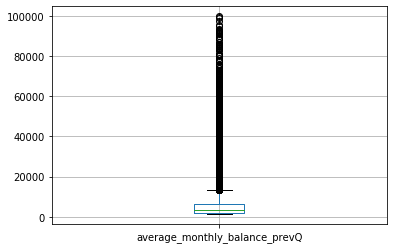

In [610]:
f = 'average_monthly_balance_prevQ'
data = data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

7.32812253015154

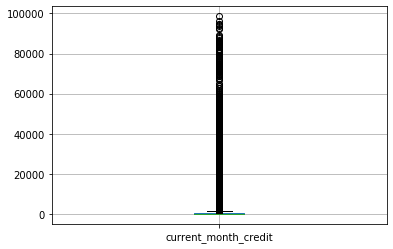

In [611]:
f = 'current_month_credit'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

7.216647719166356

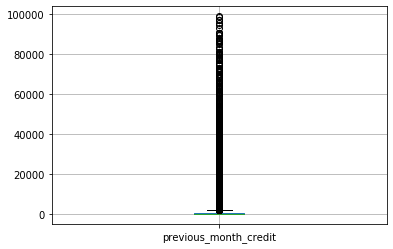

In [612]:
f = 'previous_month_credit'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

6.55305161657061

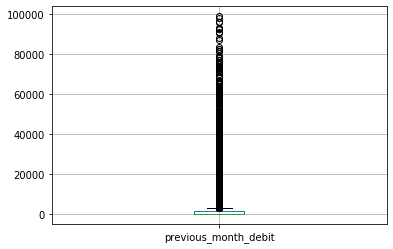

In [613]:
f = 'previous_month_debit'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

6.928700260545263

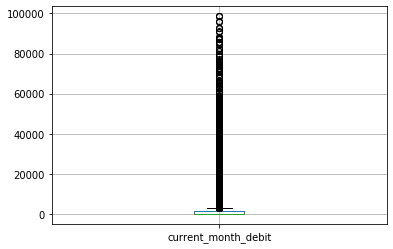

In [614]:
f = 'current_month_debit'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.7039827430015935

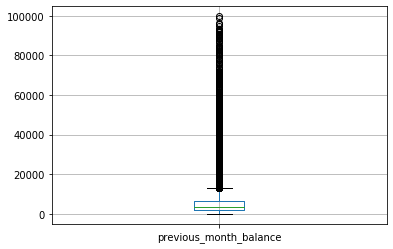

In [615]:
f = 'previous_month_balance'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.529912330058992

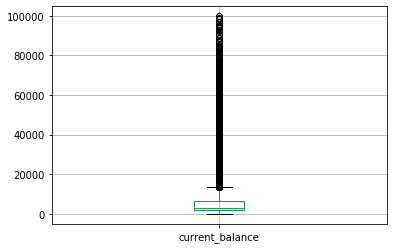

In [616]:
f = 'current_balance'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

4.643821476891537

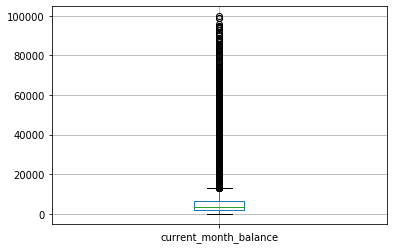

In [617]:
f = 'current_month_balance'
data= data[data[f]<100000]
data = data[data[f]>=0]
data.boxplot(f)
data[f].skew()

In [618]:
data.shape

(27887, 21)

In [619]:
f = 'dependents'
data[data[f]>10]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
3741,3988,293,43,Male,52.0,self_employed,531.0,2,1561,5.0,...,2270.12,1923.59,299.47,286.36,572.07,72.07,47.97,2297.21,2187.11,0
7820,8331,233,41,Male,36.0,salaried,745.0,2,1475,58.0,...,14490.23,13081.65,9164.66,0.10,714.39,0.10,0.10,14550.66,14471.34,0
9082,9688,1412,58,Male,50.0,salaried,1025.0,3,2622,11.0,...,7280.36,5717.36,1260.96,13857.19,0.04,19528.61,0.04,8597.22,7279.26,1
14016,14957,557,30,Male,25.0,self_employed,905.0,2,34,0.0,...,102.01,1526.61,1612.37,13100.21,5949.14,1737.36,3155.14,631.42,442.29,0
23681,25267,191,45,Male,32.0,salaried,345.0,3,2277,62.0,...,1074.70,1455.26,1166.65,0.46,0.46,475.67,488.20,1841.57,1167.09,0


In [620]:
data.loc[data[f]>10,f] = data[f].median()

In [621]:
data.shape

(27887, 21)

# Final Result after Outlier Treatment

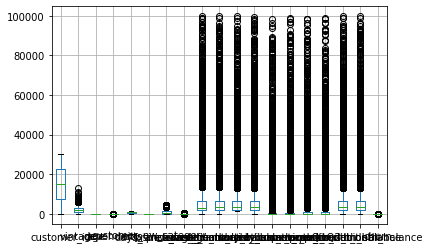

In [622]:
data.boxplot()

In [623]:
feature = ['current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance']

data_money = data[feature]
data_money = np.log(data_money + 17000)

std = StandardScaler()
scaled = std.fit_transform(data_money)

scaled



array([[-0.69069968, -0.71757894, -0.80152612, ..., -0.42823459,
        -0.74328912, -0.76044146],
       [ 0.07243903,  0.61142348,  0.47209797, ..., -0.39969628,
         0.25544861,  0.63300124],
       [-0.19730436,  0.13285245, -0.06216147, ..., -0.35491694,
        -0.01577171, -0.01575063],
       ...,
       [ 5.22727638,  5.06741868,  4.97526451, ..., -0.4078573 ,
         5.22520052,  5.05793565],
       [-0.65513845, -0.68146599, -0.74938516, ..., -0.42823459,
        -0.70605089, -0.72294233],
       [-0.55426742, -0.43172879, -0.40982821, ..., -0.1258858 ,
        -0.53689364, -0.37227542]])

In [ ]:
data.drop(labels = feature, axis = 1, inplace=True)
data = data.merge(data_money,left_index=True, right_index= True, how='left',)

In [461]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,churn,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
count,27887.000000,27887.000000,27887.000000,25464.000000,27095.000000,27887.000000,27887.000000,24678.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000
mean,15135.567325,2357.778176,48.037795,0.338164,796.306699,2.234661,929.309535,70.775144,0.181518,9.998057,10.002085,10.009118,9.996022,9.810192,9.814428,9.826878,9.829305,10.002894,10.005760
std,8744.391191,1605.438893,17.741643,0.827242,433.255011,0.656438,939.018645,86.664218,0.385454,0.253031,0.249166,0.231845,0.244565,0.194444,0.199119,0.204078,0.206256,0.241636,0.239955
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.740969,9.740972,9.821664,9.740972,9.740969,9.740969,9.740969,9.740969,9.740972,9.740972
25%,7550.500000,1117.000000,35.000000,0.000000,409.000000,2.000000,177.000000,12.000000,0.000000,9.840714,9.847105,9.861000,9.843056,9.740987,9.740987,9.740992,9.740993,9.851380,9.855670
50%,15124.000000,2012.000000,46.000000,0.000000,834.000000,2.000000,578.000000,31.000000,0.000000,9.915775,9.920782,9.927952,9.919873,9.741005,9.741006,9.745765,9.746839,9.923419,9.924740
75%,22700.500000,3169.000000,60.000000,0.000000,1096.000000,3.000000,1443.000000,97.000000,0.000000,10.064560,10.065394,10.063466,10.059637,9.778124,9.782148,9.812835,9.812795,10.064962,10.063945
max,30301.000000,12899.000000,90.000000,9.000000,1649.000000,3.000000,4782.000000,365.000000,1.000000,11.667865,11.667865,11.667865,11.666936,11.657650,11.660844,11.657650,11.660959,11.667865,11.667865


In [462]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'churn', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance'],
      dtype='object')

# Dealing with Missing values

In [463]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             486
dependents                        2423
occupation                          70
city                               792
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3209
churn                                0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
dtype: int64

In [464]:
# gender : try with mode
gender_mode = data['gender'].mode()[0]
print(gender_mode)
data['gender'].fillna(gender_mode,inplace=True)

Male


In [465]:
# days_since_last_transaction : median
median1  = data['days_since_last_transaction'].median()
data['days_since_last_transaction'].fillna(median1,inplace=True)

In [466]:
#dependents with mode(if the accuracy doesent satisfy try other values)
dependents_mode = data['dependents'].mode()[0]
data['dependents'].fillna(dependents_mode,inplace=True)

## To fill the nan values of occupation and city
### 1. first fill the nan occupation with the city wise mode values
### 2. then fill the nan city with with the occupation mode values
### 3. if both city and occupation is nan, fillna with global modes

In [467]:
city_mode = data['city'].mode()[0]
occupation_mode = data['occupation'].mode()[0]
index = data[data['city'].isnull()&data['occupation'].isnull()]
index
index.index

Int64Index([1893, 8966], dtype='int64')

In [468]:

data.loc[index.index,'city'] = city_mode
data.loc[index.index,'occupation'] = occupation_mode

In [469]:
#lets deal with the nan occupation
import numpy as np
dict1 = {}
c=0
list_city_occu_nan = data[data['occupation'].isnull()==True]['city'].values.tolist()
#data[data['city']==57]['occupation'].mode().empty
#print(data[data['city']==749]['occupation'].mode())

for i in list_city_occu_nan:
    mode_occupation_nan = data[data['city']==i]['occupation'].mode()
    if mode_occupation_nan.empty == False:
        #print('\n\n\n',i,"-",mode_occupation_nan[0])
        c =c +1
        dict1[i] = mode_occupation_nan[0]
    else:
        dict1[i] = occupation_mode
#print(c)



pointer = data[data['city']==619]
idex= pointer[pointer['occupation'].isnull()].index


#print(pointer)


for city in dict1:
    occ = dict1[city]
    #print(occ)
    #print(city)
    pointer = data[data['city']==city]
    idex= pointer[pointer['occupation'].isnull()].index
    #print(idex)
    data.loc[idex, 'occupation'] = occ

    
#dict1

In [470]:
#lets deal with the nan city
dict2 = {}
c=0
list_occ_city_nan = data[data['city'].isnull()==True]['occupation'].values.tolist()
#data[data['city']==57]['occupation'].mode().empty
#print(data[data['city']==749]['occupation'].mode())

for i in list_occ_city_nan:
    mode_city_nan = data[data['occupation']==i]['city'].mode()
    if mode_city_nan.empty == False:
        #print('\n\n\n',i,"-",mode_occupation_nan[0])
        #c =c +1
        dict2[i] = mode_city_nan[0]
    else:
        dict2[i] = city_mode
#print(c)

for occ in dict2:
    city = dict2[occ]
    #print(occ)
    #print(city)
    pointer = data[data['occupation']==occ]
    idex= pointer[pointer['city'].isnull()].index
    data.loc[idex,'city'] = city

#dict2

In [471]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
churn                             0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
dtype: int64

In [472]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
churn                               int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

# For Classification we need to drop the unecessary features and change some features:
### Customer id needs to be dropped
### Number encode Gender, Occupation.
### City and Branch Code are categorial Variables. But We will keep them as it is. Since they are already number encoded

In [473]:
data.drop(labels='customer_id',axis = 1,inplace=True)

In [474]:
data['gender']= data['gender'].astype('category')
data.dtypes

vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                          object
city                               float64
customer_nw_category                 int64
branch_code                          int64
days_since_last_transaction        float64
churn                                int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
dtype: object

In [475]:
data['gender_cat'] = data['gender'].cat.codes

In [476]:
data

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,churn,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,0,...,9.823292,9.823292,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1
1,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,0,...,10.154428,10.118569,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1
2,2356,31,Male,0.0,salaried,146.0,2,41,31.0,0,...,10.035186,9.994706,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1
3,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,1,...,9.867441,9.856634,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,1,...,9.820199,9.833243,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,Female,0.0,student,1020.0,2,1207,70.0,0,...,9.802364,9.866937,9.892816,9.740986,9.740986,9.740986,9.740986,9.802364,9.802364,0
28378,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,0,...,9.955568,9.936382,9.945855,9.741069,9.741103,9.792612,9.798908,9.939749,9.937421,0
28379,297,47,Male,0.0,salaried,1096.0,2,588,0.0,1,...,11.264689,11.162585,10.569413,9.983538,9.946694,9.750816,9.745183,11.265470,11.219416,1
28380,2585,50,Male,3.0,self_employed,1219.0,3,274,31.0,0,...,9.832290,9.835380,9.844662,9.740980,9.740980,9.740980,9.740980,9.832290,9.832290,1


In [477]:
data['occupation']= data['occupation'].astype('category')
print(data.dtypes)
data['occupation_cat'] = data['occupation'].cat.codes
data

vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                               float64
customer_nw_category                 int64
branch_code                          int64
days_since_last_transaction        float64
churn                                int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
gender_cat                            int8
dtype: object


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,churn,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat,occupation_cat
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,0,...,9.823292,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1,3
1,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,0,...,10.118569,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1,3
2,2356,31,Male,0.0,salaried,146.0,2,41,31.0,0,...,9.994706,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1,2
3,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,1,...,9.856634,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1,3
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,1,...,9.833243,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,Female,0.0,student,1020.0,2,1207,70.0,0,...,9.866937,9.892816,9.740986,9.740986,9.740986,9.740986,9.802364,9.802364,0,4
28378,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,0,...,9.936382,9.945855,9.741069,9.741103,9.792612,9.798908,9.939749,9.937421,0,3
28379,297,47,Male,0.0,salaried,1096.0,2,588,0.0,1,...,11.162585,10.569413,9.983538,9.946694,9.750816,9.745183,11.265470,11.219416,1,2
28380,2585,50,Male,3.0,self_employed,1219.0,3,274,31.0,0,...,9.835380,9.844662,9.740980,9.740980,9.740980,9.740980,9.832290,9.832290,1,3


In [478]:
data['occupation_cat'].value_counts()

3    17203
2     6597
4     2053
1     1995
0       39
Name: occupation_cat, dtype: int64

In [479]:
data['branch_code']= data['branch_code'].astype('category')
print(data.dtypes)
data['branch_code_cat'] = data['branch_code'].cat.codes
data

vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                               float64
customer_nw_category                 int64
branch_code                       category
days_since_last_transaction        float64
churn                                int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
gender_cat                            int8
occupation_cat                        int8
dtype: object


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,churn,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat,occupation_cat,branch_code_cat
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,0,...,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1,3,676
1,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,0,...,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1,3,2680
2,2356,31,Male,0.0,salaried,146.0,2,41,31.0,0,...,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1,2,40
3,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,1,...,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1,3,530
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,1,...,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1,3,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,Female,0.0,student,1020.0,2,1207,70.0,0,...,9.892816,9.740986,9.740986,9.740986,9.740986,9.802364,9.802364,0,4,1006
28378,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,0,...,9.945855,9.741069,9.741103,9.792612,9.798908,9.939749,9.937421,0,3,205
28379,297,47,Male,0.0,salaried,1096.0,2,588,0.0,1,...,10.569413,9.983538,9.946694,9.750816,9.745183,11.265470,11.219416,1,2,536
28380,2585,50,Male,3.0,self_employed,1219.0,3,274,31.0,0,...,9.844662,9.740980,9.740980,9.740980,9.740980,9.832290,9.832290,1,3,252


In [480]:
data.drop(labels='branch_code',axis=1,inplace=True)

In [481]:
data['branch_code_cat'].value_counts()

18      141
5       135
59      117
7       107
15      103
       ... 
3059      1
2552      1
3043      1
2584      1
2047      1
Name: branch_code_cat, Length: 3180, dtype: int64

In [482]:
data.drop(labels='occupation',axis=1,inplace=True)

In [483]:
data.drop(labels='gender',axis=1,inplace=True)

In [484]:
data

,vintage,age,dependents,city,customer_nw_category,days_since_last_transaction,churn,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat,occupation_cat,branch_code_cat
0,3135,66,0.0,187.0,2,224.0,0,9.823292,9.823292,9.823292,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1,3,676
1,310,35,0.0,1020.0,2,60.0,0,10.016386,10.154428,10.118569,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1,3,2680
2,2356,31,0.0,146.0,2,31.0,0,9.948134,10.035186,9.994706,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1,2,40
3,478,90,0.0,1020.0,2,147.0,1,9.867441,9.867441,9.856634,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1,3,530
4,2531,42,2.0,1494.0,3,58.0,1,9.794103,9.820199,9.833243,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1,3,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,0.0,1020.0,2,70.0,0,9.802364,9.802364,9.866937,9.892816,9.740986,9.740986,9.740986,9.740986,9.802364,9.802364,0,4,1006
28378,4919,34,0.0,1046.0,2,14.0,0,9.944826,9.955568,9.936382,9.945855,9.741069,9.741103,9.792612,9.798908,9.939749,9.937421,0,3,205
28379,297,47,0.0,1096.0,2,0.0,1,11.320699,11.264689,11.162585,10.569413,9.983538,9.946694,9.750816,9.745183,11.265470,11.219416,1,2,536
28380,2585,50,3.0,1219.0,3,31.0,0,9.832290,9.832290,9.835380,9.844662,9.740980,9.740980,9.740980,9.740980,9.832290,9.832290,1,3,252


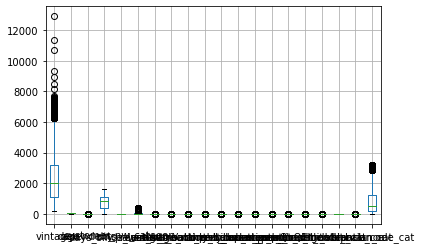

In [485]:
data.boxplot()

In [486]:
data.dtypes

vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
days_since_last_transaction       float64
churn                               int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
gender_cat                           int8
occupation_cat                       int8
branch_code_cat                     int16
dtype: object

In [487]:
data.to_csv("data_cleaned_churn.csv")